
# Sand Box


In [1]:
from gd05 import GenDifS_Map

In [16]:
mm = "Schnitzel_DE"

In [17]:
o = GenDifS_Map(f"../mm/{mm}.mm", verbose = 1, update_mindmap=True)

input dir = /home/dsci/a/l/lib/gendifs_05/mm
reading ../mm/Schnitzel_DE.mm: 20 nodes
Parsing XML: #1 start nodes
ontology node IDs: {'ID_1341768789': 'ONTOLOGY'}
RDF: 280 1177
output dir = /home/dsci/a/l/lib/gendifs_05/mm
updated mindmap with backup to ../mm/Schnitzel_DE.mm_backup_2022-09-07T13-13-05


In [67]:
my_query = """
SELECT DISTINCT ?s ?p ?o
WHERE {
    ?s ?p ?o .
    ?s rdf:type :Kalbschnitzel 
}"""

qres = o.rdflib.query(my_query)
for row in qres:
    print(row.s, row.p, row.o)

http://mm2ttl.net/namespace/ex#Kalbschnitzel_ID_1827400828 http://www.w3.org/1999/02/22-rdf-syntax-ns#type http://mm2ttl.net/namespace/default#Kalbschnitzel
http://mm2ttl.net/namespace/ex#Kalbschnitzel_ID_1953543047 http://www.w3.org/1999/02/22-rdf-syntax-ns#type http://mm2ttl.net/namespace/default#Kalbschnitzel


In [4]:
import pandas as pd
pd.DataFrame.from_dict(o.node_dict, orient='index').sort_index().T


0            1                         2   \
parseType                 object   collection                    object   
TEXT                  topConcept          NaN        Milch <pwn:milk#1>   
parent_object_ID               0            0                         0   
parent_collection_ID         1.0          1.0                       NaN   
tag                          NaN           BY                       NaN   
BY                           NaN  topProperty                       NaN   
SOME                         NaN   topConcept                       NaN   
ID                           NaN          NaN                       2.0   
mm_ID                        NaN          NaN              ID_792590473   
RESOURCE                     NaN          NaN                     Milch   
LINK                         NaN          NaN              <pwn:milk#1>   
object_ID                    NaN          NaN                       2.0   
collection_ID                NaN          NaN                       1.0   
md                           NaN          NaN  * **Milch <pwn:milk#1>**   
REV                          NaN          NaN                       NaN   
BT                           NaN          NaN                       NaN   
ERROR                        NaN          NaN                       NaN   

                                                                     3   \
parseType                                                    collection   
TEXT                  DEF  [Wikipedia -> Milch](https://de.wikipedia...   
parent_object_ID                                                      2   
parent_collection_ID                                                1.0   
tag                                                                 DEF   
BY                                                                  NaN   
SOME                                                                NaN   
ID                                                                  3.0   
mm_ID                                                      ID_780109244   
RESOURCE                                                                  
LINK                                                                      
object_ID                                                           NaN   
collection_ID                                                       3.0   
md                                                                  NaN   
REV                                                                 NaN   
BT                                                                  NaN   
ERROR                                                               NaN   

                                                                     4   \
parseType                                                       literal   
TEXT                  Eine ''' Emulsion [Wikipedia -> Milch](https:/...   
parent_object_ID                                                      2   
parent_collection_ID                                                NaN   
tag                                                                 NaN   
BY                                                                  NaN   
SOME                                                                NaN   
ID                                                                  4.0   
mm_ID                                                      ID_937861573   
RESOURCE                                                            NaN   
LINK                                                                NaN   
object_ID                                                           4.0   
collection_ID                                                       3.0   
md                                                                  NaN   
REV                                                                 NaN   
BT                                                                  NaN   
ERROR                                                

In [5]:
o.result_dict

{'start': ['# ONTOLOGY',
  '\n',
  'Milch <pwn:milk#1>',
  '* DEF  [Wikipedia -> Milch](https://de.wikipedia.org/wiki/Milch)',
  "  * Eine ''' Emulsion [Wikipedia -> Milch](https://de.wikipedia.org/wiki/Milch)",
  '\n',
  'Milch',
  '\n',
  'Rapphengst <http://wiki/Rapphengst>',
  '* SUP',
  '  * Rappe',
  '  * Hengst',
  '\n',
  'Anna',
  '* REV liebt <https://de.wikipedia.org/wiki/Ben_liebt_Anna>',
  '  * Ben',
  '\n',
  'Russland',
  '* BT',
  '  * Putin',
  '    * ABC',
  '      * War']}

In [4]:
o.parser_markdown()



* **Milch <pwn:milk#1>**


* **Milch**
* **Rapphengst <http://wiki/Rapphengst>**

    * **Rappe**
    * **Hengst**
* **Anna**
  * REV *liebt <https://de.wikipedia.org/wiki/Ben_liebt_Anna>* <https://de.wikipedia.org/wiki/Ben_liebt_Anna>
    * **Ben**
* **Russland**
  * BT ** 
    * **Putin**


In [7]:
o.rdflib.serialize(destination=f"../ttl/{mm}.ttl")

<Graph identifier=Ncbe7cfe673ac4af4959f410a31d35c7a (<class 'rdflib.graph.Graph'>)>

In [8]:
import rdflib
from rdflib.extras.external_graph_libs import rdflib_to_networkx_multidigraph

In [9]:
#!pip install networkx

In [10]:
import networkx as nx
import matplotlib.pyplot as plt

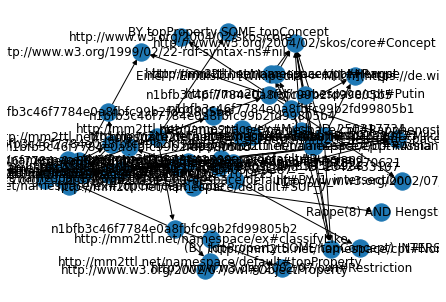

In [11]:
url = 'https://www.w3.org/TeamSubmission/turtle/tests/test-30.ttl'

g = rdflib.Graph()
result = g.parse(url, format='turtle')

#G = rdflib_to_networkx_multidigraph(result)

G = rdflib_to_networkx_multidigraph(o.rdflib)


# Plot Networkx instance of RDF Graph
pos = nx.shell_layout(G, scale=1000)
edge_labels = nx.get_edge_attributes(G, 'r')
#nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
nx.draw(G, with_labels=True)


In [12]:
o.owlrl

<Graph identifier=N7e7daad5fdfe42af9b424caf40bbebc4 (<class 'rdflib.graph.Graph'>)>

The parser will read the mindmap file, parse the content, and store the result in the dictionary `o.node_dict`.

This dict is acessable from outside, e.g. like this:

Then raw turtle code will be generated. It's stored in the list `o.turtle_list`. To conveniently inspect distinct entries, use the method `o.show_turtle([ <list of IDs > ])`, e.g.:

In [13]:
print(o.show_turtle([]))


# 1
# COLLECTION.a, context
#   None: None
#     None: None
#       None: None



# 1
# BY.a, owl
:topProperty
   rdf:type owl:ObjectProperty .


# 1
# BY.b, owl
:topConcept
   a owl:Class .


# 1
# BY.c, owl-test
ex:topConcept_None
   a :topConcept .



# 1
# BY.g, owl-classification
:BY_1_restriction
   a owl:Class ;
   rdfs:label "BY topProperty SOME topConcept" ;
   owl:equivalentClass [ a owl:Restriction ;
      owl:onProperty :topProperty ;
      owl:someValuesFrom :topConcept ] .



# 1
# BY.h, owl-classification
:BY_1_intersection
   a owl:Class ;
   rdfs:label "(BY topProperty SOME topConcept) INTERSECT None_None" ;
   rdfs:subClassOf :None ;
   owl:equivalentClass [ a owl:Class ;
      owl:intersectionOf (
         :BY_1_restriction
         :None ) ] .



# 2
# OBJECT_BY.a, owl
:Milch
   a owl:Class ; # <pwn:milk#1>
   rdfs:subClassOf :None .


# 2
# OBJECT_BY.b, owl-test
ex:Milch_ID_792590473
   a :Milch .



# 2
# OBJECT_BY.c, skos
cpt:Milch
   a skos:Concept ;
   skos:br

`focus_map` prints a subset of the mindmap focused on a set of nodes

In [14]:
from rdflib import Graph, URIRef, Literal
import owlrl
graph = Graph()

In [15]:
ttl = o.show_turtle([2])
print(ttl)


# 2
# OBJECT_BY.a, owl
:Milch
   a owl:Class ; # <pwn:milk#1>
   rdfs:subClassOf :None .


# 2
# OBJECT_BY.b, owl-test
ex:Milch_ID_792590473
   a :Milch .



# 2
# OBJECT_BY.c, skos
cpt:Milch
   a skos:Concept ;
   skos:broaderTransitive cpt:None .


In [16]:
namespaces = """
# namespaces to be aligned by the user 
@prefix ex: <http://mm2ttl.net/namespace/ex#> .
@prefix cpt: <http://mm2ttl.net/namespace/x#> .
@prefix : <http://mm2ttl.net/namespace/default#> .

# standard namespaces, c.f. https://www.w3.org/TR/owl2-quick-reference/
@prefix owl: <http://www.w3.org/2002/07/owl#> .
@prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .
@prefix xml: <http://www.w3.org/XML/1998/namespace> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .
@prefix skos: <http://www.w3.org/2004/02/skos/core#> .

ex:classifyLike a owl:ObjectProperty .
[ rdf:type owl:Ontology ; owl:imports <http://www.w3.org/2004/02/skos/core> ] .
"""


In [17]:
graph.parse(data = namespaces+ttl, format='ttl')

<Graph identifier=Ne6d86911e3d94a29bfff6c5579156317 (<class 'rdflib.graph.Graph'>)>

In [18]:
len(o.turtle_list)

43

In [19]:
from IPython.display import display, Markdown


In [20]:
display(Markdown("# Hallo <span style='color:red'>ROT</span> und <span style='color:blue'>BLAU</span>"))

# Hallo <span style='color:red'>ROT</span> und <span style='color:blue'>BLAU</span>

In [21]:
txt = """text mit 3 '''!"""

In [22]:
"'''" in txt

True

In [23]:
import re